# Lab 02.a - Week 3 - Solutions
## Early Fire Detection with Multi-Layer Perceptron 

## **Challenge 01**


First, let's load the saved NumPy array data from your previous lab and complete the sections marked with `TODO X` comments.

In [1]:
import os

if(not os.path.exists('processed_data')):
    !mkdir -p processed_data
    !unzip processed_data.zip -d processed_data


In [2]:
import os
import numpy as np

# ----------answer-----------------------
save_path = 'processed_data'
X = np.load(os.path.join(save_path, 'X.npy')  )
X_test = np.load(os.path.join(save_path, 'X_test.npy') )
y = np.load(os.path.join(save_path, 'y.npy')  )
y_test = np.load(os.path.join(save_path, 'y_test.npy') )
# ---------------------------------

## **Challenge 02**

Now, let’s build our multi-layer perceptron model to detect wildfires!

In [3]:
#TODO 01 - Let’s begin with a simple Multi-Layer Perceptron (MLP) model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam


# ----------answer-----------------------
input_shape = X.shape[1:]

model = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Use a single output neuron with a sigmoid activation function for binary classification.
])
# ---------------------------------
# Display the model architecture to visualise its layers and parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,844,529 (14.67 MB)

 Trainable params: 3,844,529 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#TODO 02 - Let’s compile our MLP model with an appropriate loss function, optimizer, and evaluation metrics.

# ----------answer-----------------------
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='BinaryCrossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)

In [5]:
#TODO 03 - Let’s train our MLP model using the training data while monitoring its performance on the validation set.
import time
start_time = time.time()

# ----------answer-----------------------

history = model.fit(
    X, y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data as a validation set
    verbose=1,
)

# -------------------


end_time = time.time()
training_time = end_time - start_time

print("Training Time (s): ", training_time)

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7135 - loss: 1.1771 - val_accuracy: 0.7955 - val_loss: 0.4934
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8467 - loss: 0.4346 - val_accuracy: 0.7515 - val_loss: 0.4951
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8406 - loss: 0.3476 - val_accuracy: 0.8038 - val_loss: 0.4075
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8555 - loss: 0.3234 - val_accuracy: 0.8038 - val_loss: 0.3928
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8876 - loss: 0.2753 - val_accuracy: 0.8966 - val_loss: 0.2342
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8865 - loss: 0.2588 - val_accuracy: 0.8716 - val_loss: 0.3019
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8961 - loss: 0.2648 - val_accuracy: 0.7610 - val_loss: 0.4983
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8725 - loss: 0.3026 - val_accuracy: 0.

In [6]:
#TODO 04 - Evaluate the MLP model on the test data to assess its performance.
# ----------answer-----------------------
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.6374


[0.6146780252456665, 0.7551020383834839]

Let’s visualise the training and validation curves to assess the model's performance. Analyse the curves to determine if there is overfitting or underfitting.


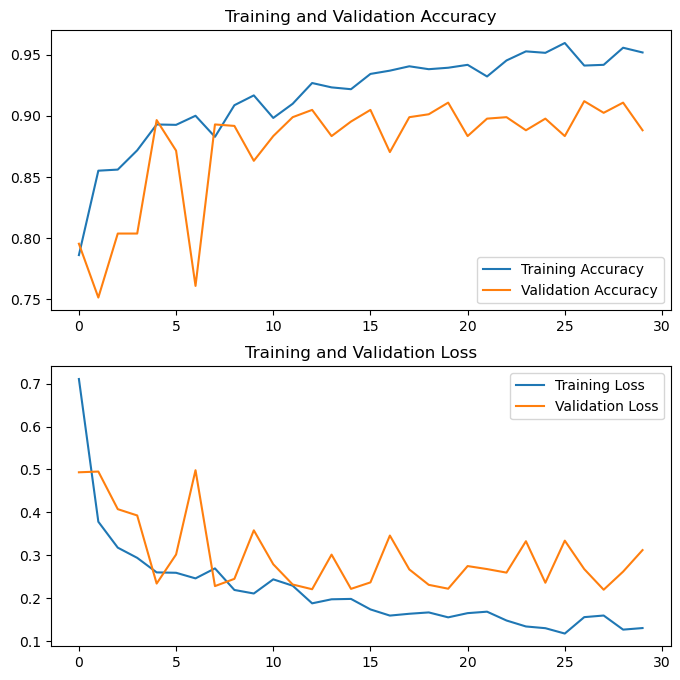

In [7]:
import matplotlib.pyplot as plt

def Plot_acc_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(loss))

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
Plot_acc_loss(history)

Now, let’s evaluate our model using classification metrics such as accuracy, precision, recall, and F1-score to gain deeper insights into its performance.

In [8]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
binary_predictions = [1 if p > 0.5 else 0 for p in pred]


print(classification_report(y_test, binary_predictions))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.73      0.79      0.76        24

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.76        49
weighted avg       0.76      0.76      0.75        49



And let’s analyse the confusion matrix to understand the model's performance in correctly and incorrectly classifying each class.

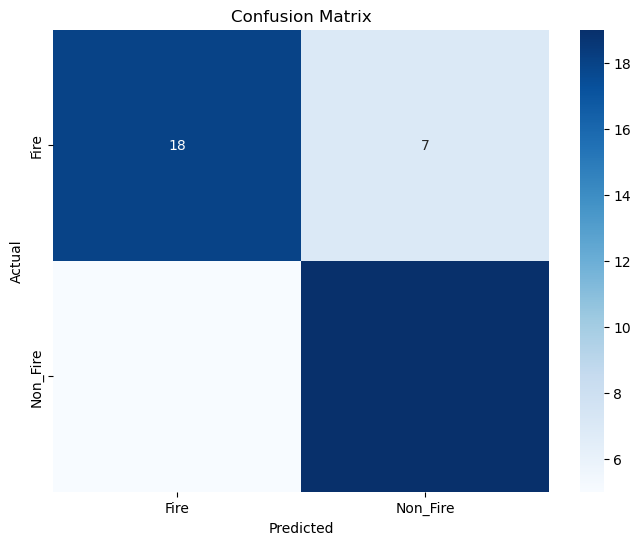

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
#TODO 05 - Complete the function to calculate and display the classification metrics and the confusion matrix for the model's predictions.

# ----------answer-----------------------

def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Define class labels
  class_labels = ['Fire', 'Non_Fire']

  # Create a DataFrame
  cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
plot_confusion_matrix(y_test, binary_predictions)
# ---------------------------------



Finally, let’s visualise the images along with their predicted and true labels to better understand the model’s performance.

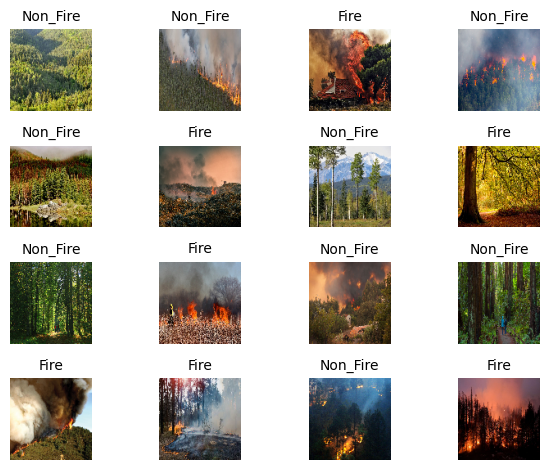

In [10]:
import random
reverse_label_map = {
    0:"Fire",1:"Non_Fire"
}
def view_grid_figures(predictions):
  combined_list = list(zip(X_test, predictions))
  Samples = random.sample(combined_list, 16)

  total_images = 16
  grid_size = (4,4)

  fig, axes = plt.subplots(grid_size[0], grid_size[1])
  axes = axes.flatten()

  for idx in range(total_images):
      ax = axes[idx]
      ax.axis('off')


      img = Samples[idx][0]
      label = Samples[idx][1]
      ax.imshow(img)

      ax.set_title(reverse_label_map[label], fontsize=10)

  plt.tight_layout()
  plt.show()

view_grid_figures(binary_predictions)

Analysing Model Inference Time

In [11]:
inference_times = []

# Perform inference and record times
for i in range(len(X_test)):
    start_time = time.time()
    _ = model.predict(np.array([X_test[i,:,:,:]]), verbose=0)
    end_time = time.time()
    inference_times.append(end_time - start_time)

# Calculate average and standard deviation
avg_time = np.mean(inference_times)
std_time = np.std(inference_times)

print(f"Training Time: {training_time} s")
print(f'Average Inference Time over {len(X_test)} runs: {avg_time*1000:.2f} ms')
print(f'Standard Deviation: {std_time*1000:.2f} ms')

Training Time: 15.394980907440186 s
Average Inference Time over 49 runs: 13.74 ms
Standard Deviation: 0.72 ms
